In [26]:
# stack trace handler manipulates stack traces.
# It cleans stack traces from unecessary informations
# and finds the sequence of files.
# Stores the information on the filenames_dict

In [38]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#initialize the dictionary and the path to find the stack traces
dir_path       = '../elastic_search'
filenames_dict = {}
tags_list      = []

In [40]:
# remove text from the stack trace 
# and keep only the sequence of functions
# returns a list with the function calls
def clean_stack_trace(stack_trace):
    
    clean_stack_trace = []
    
    temp_1     = stack_trace.replace(r'\tat','  at').replace('\"at ',' at ')
    temp_stack = temp_1.split(" at ")[1:]
    
    if(temp_stack == []):
        temp_stack_2 = temp_1.split(' ')
        for t in temp_stack_2:
            if t.count('.')>2 and t.find('(') != -1 and t.find(')') != -1:
                if t.find('.java:') > t.find('(') and t.find('.java:') < t.find(')'):
                    if len(t.split())>1:
                        temp_stack.append(t.split()[1])
                    else:
                        temp_stack.append(t)
                
    to_find = re.compile("[|,|<|>]|\|=")
    
    #find where each function ends and keep only the path
    for f in temp_stack:
        temp      = f.find(')')
        temp_file = f[0:temp]
        
        # check the punctuations in order to 
        # avoid anything else
        match_obj = to_find.search(temp_file)
        if match_obj == None:
            clean_stack_trace.append(find_filename(temp_file))
        
    return clean_stack_trace

In [41]:
# remove the name of the function and store only the file
# which contains the function.  
# This is done by tracking the full stop
def find_filename(value):
    filename = ""
    words    = value.split("(")
    if len(words)>=2:
        parts = words[0].split(".")
        filename = ".".join(parts[0:-1])
        
    return filename

In [42]:
# proceed for every file in the directory
stack_traces_counter = 0  
keep = 0 

for fname in os.listdir(dir_path):
    with open(os.path.join(dir_path,fname)) as json_file:
        
        print("working on file",fname,"\n")
        
        #load data
        data = json.load(json_file)
        
        for counter,value in enumerate(data):
            dirty_stack_trace = value['stack_trace']
            
            if dirty_stack_trace != []:
                
                stack_traces_counter += 1
                temp_list = value['tags']
                
                for i in range(len(temp_list)):
                    temp_list[i] = temp_list[i].strip()
                tags_list.append(temp_list)
                
                #print("working on stack trace on issue",counter+1,"\n")
                
                if len(dirty_stack_trace)>1:
                    dirty_stack_trace = [' '.join(dirty_stack_trace)]
                
                stack_trace = clean_stack_trace(dirty_stack_trace[0])
                
                if stack_trace != []:
                    keep += 1
                    
                for counter2,value2 in enumerate(stack_trace):
                    
                    filename = value2
                    
                    # in case filename is empty move on the next
                    if filename == "":
                        continue
                    
                    # if filename already in dict. just add the next file
                    if filename in filenames_dict:
                        
                        #find next file if exists
                        next_filename = ""
                        
                        if counter2+1<len(stack_trace):
                            next_filename = stack_trace[counter2+1]
                        
                        if next_filename != "":
                            exist_flag = False
                            
                            for count,i in enumerate(filenames_dict[filename]):
                                if next_filename == i["name"]:
                                    exist_flag = True
                                    location = "page"+fname[13:fname.find('.')]+"_issue"+str(counter+1)
                                    filenames_dict[filename][count]["occurance"] += 1
                                    if location not in filenames_dict[filename][count]["location"]:
                                        filenames_dict[filename][count]["location"].append(location)
                                    break
                                
                            if exist_flag == False:
                                location = "page"+fname[13:fname.find('.')]+"_issue"+str(counter+1)
                                filenames_dict[filename].append({"name":next_filename,"location":[location],"occurance":1})
                            
                    # if filename isnt in dict initialize it.
                    else:
                        
                        #find next file if exists
                        next_filename = ""
                        
                        if counter2+1<len(stack_trace):
                            next_filename = stack_trace[counter2+1]
                        
                        #store the filename in dict only if exists next file.
                        if next_filename != "":
                            location = "page"+fname[13:fname.find('.')]+"_issue"+str(counter+1)
                            filenames_dict[filename] = [{"name": next_filename,"location":[location],"occurance":1}]

working on file data_word_emb94.json 

working on file data_word_emb313.json 

working on file data_word_emb26.json 

working on file data_word_emb384.json 

working on file data_word_emb58.json 

working on file data_word_emb380.json 

working on file data_word_emb130.json 

working on file data_word_emb215.json 

working on file data_word_emb156.json 

working on file data_word_emb128.json 

working on file data_word_emb265.json 

working on file data_word_emb334.json 

working on file data_word_emb157.json 

working on file data_word_emb336.json 

working on file data_word_emb177.json 

working on file data_word_emb22.json 

working on file data_word_emb276.json 

working on file data_word_emb28.json 

working on file data_word_emb379.json 

working on file data_word_emb79.json 

working on file data_word_emb293.json 

working on file data_word_emb152.json 

working on file data_word_emb126.json 

working on file data_word_emb301.json 

working on file data_word_emb114.json 

workin

working on file data_word_emb353.json 

working on file data_word_emb200.json 

working on file data_word_emb274.json 

working on file data_word_emb98.json 

working on file data_word_emb43.json 

working on file data_word_emb261.json 

working on file data_word_emb121.json 

working on file data_word_emb304.json 

working on file data_word_emb343.json 

working on file data_word_emb40.json 

working on file data_word_emb65.json 

working on file data_word_emb368.json 

working on file data_word_emb25.json 

working on file data_word_emb337.json 

working on file data_word_emb60.json 

working on file data_word_emb77.json 

working on file data_word_emb377.json 

working on file data_word_emb50.json 

working on file data_word_emb57.json 

working on file data_word_emb182.json 

working on file data_word_emb246.json 

working on file data_word_emb185.json 

working on file data_word_emb27.json 

working on file data_word_emb2.json 

working on file data_word_emb189.json 

working on f

In [43]:
print(keep)

3109


In [44]:
# STATISTICS
# find the average of different connections for every file
# find maximum occurance frequency
# find number of different files
total_number  = 0
total_counter = 0
max_occur     = -1

for key in filenames_dict:
    total_counter      = total_counter + 1
    
    if len(filenames_dict[key]) > max_occur:
        max_occur = len(filenames_dict[key])
    
    total_number       = total_number + len(filenames_dict[key])

print("number of different files",total_counter)
print("the mean occurance rate is",total_number/total_counter)
print("maximum occurance frequensy",max_occur)
print("total number of stack traces",stack_traces_counter)

number of different files 5994
the mean occurance rate is 2.482816149482816
maximum occurance frequensy 412
total number of stack traces 3505


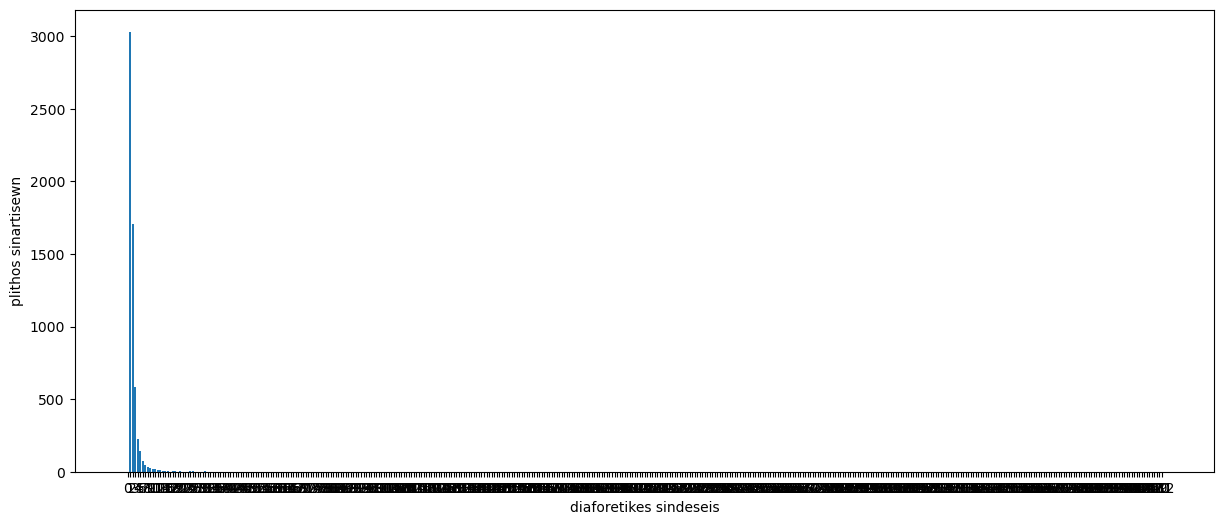

In [45]:
# create histogram with occurance rates

frequencies = np.zeros(max_occur+1)
freq_index  = [i for i in range(max_occur+1)]

for key in filenames_dict:
    
    freq = len(filenames_dict[key])
    frequencies[freq]  += 1
    
plt.figure(figsize=(50, 6))
plt_item = plt.subplot(132)
plt_item.bar(freq_index,frequencies)
plt_item.set_xticks(np.arange(len(freq_index)))
plt_item.set_xticklabels(freq_index)
plt.xlabel("diaforetikes sindeseis")
plt.ylabel("plithos sinartisewn")
plt.show()

In [46]:
# for debugging purposes print the connections and occurance rate for each file 
for key in filenames_dict:
    print("file:",key," connects")
    for connection in filenames_dict[key]:
        print(connection["name"],connection["occurance"],connection["location"])
    print("++++++++++++++++++++")

file: __randomizedtesting.SeedInfo  connects
org.hamcrest.MatcherAssert 572 ['page94_issue8', 'page94_issue9', 'page94_issue17', 'page313_issue24', 'page26_issue9', 'page384_issue21', 'page384_issue25', 'page58_issue4', 'page58_issue7', 'page58_issue9', 'page58_issue10', 'page130_issue22', 'page156_issue25', 'page128_issue5', 'page128_issue16', 'page265_issue4', 'page265_issue12', 'page157_issue5', 'page157_issue9', 'page22_issue3', 'page28_issue11', 'page28_issue24', 'page79_issue11', 'page79_issue12', 'page79_issue20', 'page79_issue23', 'page293_issue8', 'page293_issue19', 'page152_issue1', 'page152_issue16', 'page152_issue19', 'page126_issue13', 'page126_issue16', 'page126_issue20', 'page301_issue19', 'page70_issue1', 'page70_issue4', 'page70_issue25', 'page303_issue10', 'page273_issue1', 'page273_issue15', 'page273_issue16', 'page288_issue13', 'page5_issue16', 'page400_issue7', 'page400_issue11', 'page263_issue23', 'page117_issue20', 'page135_issue11', 'page37_issue2', 'page37_issu

org.elasticsearch.cluster.metadata.MetadataIndexTemplateServiceTests 1 ['page112_issue15']
org.elasticsearch.index.get.DocumentFieldTests 2 ['page141_issue21', 'page56_issue22']
org.elasticsearch.common.xcontent.MapXContentParserTests 1 ['page141_issue25']
org.junit.internal.ComparisonCriteria 1 ['page132_issue4']
org.elasticsearch.repositories.s3.S3BlobContainerRetriesTests 1 ['page132_issue4']
org.elasticsearch.repositories.gcs.GoogleCloudStorageThirdPartyTests 2 ['page230_issue17', 'page230_issue23']
org.elasticsearch.search.aggregations.AggregatorTestCase 2 ['page150_issue4', 'page129_issue8']
org.elasticsearch.xpack.test.rest.LogstashSystemIndexIT 1 ['page85_issue11']
org.elasticsearch.repositories.s3.S3BlobContainerRetriesTests$AssertingInputStream 1 ['page85_issue15']
org.elasticsearch.index.mapper.DynamicMappingIT 1 ['page85_issue20']
org.elasticsearch.cluster.routing.allocation.decider.DiskThresholdDeciderIT 1 ['page85_issue21']
org.elasticsearch.xpack.core.ssl.RestrictedTrust

org.elasticsearch.indices.recovery.RecoverySourceHandler 2 ['page273_issue4', 'page232_issue9']
org.elasticsearch.indices.recovery.RemoteRecoveryTargetHandler 1 ['page273_issue4']
org.elasticsearch.action.ActionListenerResponseHandler 7 ['page273_issue4', 'page342_issue7', 'page248_issue20', 'page232_issue9', 'page229_issue2', 'page270_issue15', 'page223_issue4']
org.elasticsearch.xpack.security.authc.TokenService 26 ['page288_issue23', 'page243_issue3', 'page123_issue20', 'page367_issue21', 'page316_issue5', 'page170_issue5', 'page359_issue17', 'page1_issue10', 'page240_issue13', 'page198_issue12', 'page207_issue8', 'page24_issue1', 'page271_issue10', 'page189_issue24', 'page8_issue23', 'page399_issue8', 'page346_issue1', 'page396_issue21']
org.elasticsearch.action.ActionListener$4 3 ['page117_issue4', 'page137_issue5']
java.net.AbstractPlainSocketImpl 4 ['page117_issue15']
org.elasticsearch.search.SearchService$2 29 ['page217_issue10', 'page227_issue25', 'page198_issue11', 'page237_i

org.elasticsearch.client.CrudIT 1 ['page293_issue1']
org.elasticsearch.client.RestClient$SyncResponseListener 2 ['page293_issue1', 'page327_issue21']
org.elasticsearch.client.RestClient$1 5 ['page293_issue1', 'page306_issue18', 'page305_issue23', 'page327_issue21', 'page257_issue7']
java.base/java.util.concurrent.CompletableFuture$AsyncSupply 1 ['page70_issue22']
com.paloaltonetworks.cortex.ingestion.beacon.store.es.ElasticSearchStore 1 ['page87_issue3']
org.elasticsearch.client.IndicesClient 12 ['page249_issue4', 'page213_issue7', 'page13_issue6', 'page102_issue2', 'page269_issue8', 'page99_issue13', 'page101_issue18', 'page396_issue8', 'page257_issue7', 'page9_issue6']
org.elasticsearch.client.RestHighLevelClient$1 6 ['page149_issue12', 'page34_issue5', 'page100_issue24', 'page121_issue11', 'page287_issue16']
com.functest.AddByData 1 ['page68_issue12']
org.elasticsearch.ElasticsearchException 3 ['page68_issue12', 'page213_issue7', 'page205_issue3']
com.mongo.watcher.MongoApplicationW

org.elasticsearch.index.mapper.ObjectMapper 1 ['page296_issue4']
org.elasticsearch.xpack.ilm.history.ILMHistoryStore$1 1 ['page53_issue14']
org.elasticsearch.xpack.security.authc.TokenAuthIntegTests 1 ['page47_issue15']
org.elasticsearch.index.replication.ESIndexLevelReplicationTestCase$ReplicationAction$ReplicasRef 1 ['page371_issue15']
org.elasticsearch.common.settings.Setting 2 ['page42_issue3']
org.elasticsearch.test.InternalTestCluster 1 ['page42_issue3']
++++++++++++++++++++
file: org.elasticsearch.action.support.ContextPreservingActionListener  connects
org.elasticsearch.action.support.TransportAction$1 45 ['page384_issue14', 'page380_issue8', 'page108_issue9', 'page251_issue14', 'page233_issue18', 'page359_issue12', 'page80_issue1', 'page107_issue2', 'page219_issue13', 'page254_issue17', 'page99_issue19', 'page24_issue15', 'page216_issue10', 'page40_issue4', 'page377_issue10', 'page205_issue7', 'page95_issue23', 'page53_issue14', 'page230_issue19', 'page150_issue11', 'page75_is

java.lang.ProcessImpl 1 ['page71_issue4']
sun.nio.fs.UnixFileSystem 3 ['page214_issue18', 'page294_issue15']
java.util.zip.ZipFile 1 ['page10_issue22']
org.apache.logging.log4j.core.config.plugins.util.PluginBuilder 1 ['page182_issue3']
org.elasticsearch.cluster.metadata.IndexMetaData$Builder 1 ['page205_issue25']
sun.nio.fs.WindowsException 1 ['page399_issue18']
jdk.internal.reflect.NativeConstructorAccessorImpl 1 ['page306_issue16']
org.elasticsearch.common.settings.Settings 1 ['page306_issue16']
org.elasticsearch.cluster.metadata.MetadataIndexUpgradeService 1 ['page85_issue18']
org.elasticsearch.common.time.JavaDateFormatter 1 ['page85_issue18']
org.elasticsearch.script.ScriptService 1 ['page225_issue2']
org.apache.lucene.util.NamedSPILoader 1 ['page193_issue10']
org.elasticsearch.common.Booleans 1 ['page389_issue5']
java.nio.file.TempFileHelper 1 ['page223_issue6']
org.elasticsearch.threadpool.ThreadPool 1 ['page223_issue11']
org.elasticsearch.common.unit.TimeValue 1 ['page139_issu

org.gradle.internal.operations.DefaultBuildOperationExecutor$RunnableBuildOperationWorker 2 ['page352_issue7', 'page364_issue12']
org.gradle.internal.operations.DefaultBuildOperationRunner$1 1 ['page15_issue1']
org.gradle.api.plugins.quality.internal.AbstractCodeQualityPlugin 1 ['page365_issue13']
org.gradle.internal.progress.DefaultBuildOperationExecutor$RunnableBuildOperationWorker 1 ['page370_issue22']
++++++++++++++++++++
file: org.gradle.configuration.internal.DefaultUserCodeApplicationContext  connects
org.gradle.configuration.BuildOperationScriptPlugin 4 ['page157_issue6', 'page15_issue1', 'page113_issue13', 'page161_issue24']
org.gradle.api.internal.plugins.DefaultPluginManager 7 ['page15_issue1', 'page125_issue22', 'page181_issue1']
org.gradle.api.internal.DefaultCollectionCallbackActionDecorator$BuildOperationEmittingAction$1 1 ['page239_issue1']
++++++++++++++++++++
file: org.gradle.configuration.BuildOperationScriptPlugin  connects
org.gradle.configuration.project.BuildScri

org.apache.http.impl.io.SessionInputBufferImpl 3 ['page79_issue7', 'page38_issue19', 'page299_issue12']
__randomizedtesting.SeedInfo 1 ['page148_issue11']
java.io.BufferedInputStream 2 ['page248_issue4', 'page179_issue12']
++++++++++++++++++++
file: org.apache.http.impl.io.SessionInputBufferImpl  connects
org.apache.http.impl.io.SessionInputBufferImpl 8 ['page79_issue7', 'page38_issue19', 'page143_issue3', 'page299_issue12']
org.apache.http.impl.conn.DefaultHttpResponseParser 3 ['page79_issue7', 'page143_issue3', 'page299_issue12']
org.apache.http.impl.io.ContentLengthInputStream 1 ['page38_issue19']
++++++++++++++++++++
file: org.apache.http.impl.conn.DefaultHttpResponseParser  connects
org.apache.http.impl.conn.DefaultHttpResponseParser 3 ['page79_issue7', 'page143_issue3', 'page299_issue12']
org.apache.http.impl.io.AbstractMessageParser 3 ['page79_issue7', 'page143_issue3', 'page299_issue12']
++++++++++++++++++++
file: org.apache.http.impl.io.AbstractMessageParser  connects
org.apac

java.net.PlainSocketImpl 2 ['page352_issue8']
java.net.Socket 3 ['page307_issue8']
java.net.SocketInputStream 1 ['page179_issue12']
++++++++++++++++++++
file: java.net.ServerSocket  connects
java.net.ServerSocket 11 ['page288_issue2', 'page288_issue16', 'page387_issue10', 'page350_issue9']
org.elasticsearch.mocksocket.MockServerSocket 13 ['page288_issue2', 'page288_issue16', 'page387_issue10', 'page350_issue9']
org.elasticsearch.transport.MockTcpTransport$1 1 ['page288_issue16']
java.security.AccessController 1 ['page288_issue16']
++++++++++++++++++++
file: org.elasticsearch.mocksocket.MockServerSocket  connects
org.elasticsearch.mocksocket.MockServerSocket 12 ['page288_issue2', 'page288_issue16', 'page387_issue10', 'page350_issue9']
org.elasticsearch.mocksocket.MockServerSocket$$Lambda$595/2121068139 4 ['page288_issue2']
org.elasticsearch.transport.MockTcpTransport$MockChannel 10 ['page288_issue2', 'page288_issue16', 'page350_issue9']
java.net.PlainSocketImpl 2 ['page288_issue16']
org

org.elasticsearch.painless.MethodWriter 1 ['page37_issue20']
++++++++++++++++++++
file: org.elasticsearch.painless.MethodWriter  connects
org.elasticsearch.painless.phase.DefaultIRTreeToASMBytesPhase 1 ['page37_issue20']
++++++++++++++++++++
file: java.base/java.util.Spliterators$ArraySpliterator  connects
java.base/java.util.stream.ReferencePipeline$Head 1 ['page96_issue3']
++++++++++++++++++++
file: java.base/java.util.stream.ReferencePipeline$Head  connects
org.elasticsearch.packaging.util.Docker 1 ['page96_issue3']
org.elasticsearch.cluster.service.ClusterApplierService 2 ['page183_issue23']
++++++++++++++++++++
file: org.elasticsearch.common.util.BigArrays$LongArrayWrapper  connects
org.elasticsearch.common.util.MockBigArrays$LongArrayWrapper 2 ['page96_issue6', 'page56_issue1']
org.elasticsearch.xpack.spatial.search.aggregations.GeoLineBucketedSort 1 ['page44_issue2']
org.elasticsearch.common.util.BitArray 1 ['page82_issue18']
++++++++++++++++++++
file: org.elasticsearch.common.u

org.elasticsearch.xpack.security.transport.SecurityServerTransportInterceptor$ProfileSecuredRequestHandler$1 2 ['page12_issue9', 'page307_issue11']
org.elasticsearch.transport.RequestHandlerRegistry 6 ['page342_issue7', 'page90_issue17', 'page270_issue15', 'page55_issue8']
org.elasticsearch.action.search.ClearScrollController 2 ['page342_issue7', 'page270_issue15']
org.elasticsearch.action.search.TransportSearchAction 1 ['page44_issue4']
org.elasticsearch.action.search.CanMatchPreFilterSearchPhase 1 ['page307_issue11']
org.elasticsearch.action.search.SearchTransportService 2 ['page55_issue8']
org.elasticsearch.action.search.FetchSearchPhase 2 ['page55_issue8']
++++++++++++++++++++
file: org.elasticsearch.search.aggregations.pipeline.BucketHelpers  connects
org.elasticsearch.search.aggregations.pipeline.BucketHelpers 2 ['page32_issue3']
org.elasticsearch.search.aggregations.pipeline.BucketSelectorPipelineAggregator 1 ['page32_issue3']
++++++++++++++++++++
file: org.elasticsearch.search.

java.base/java.util.concurrent.ForkJoinPool 1 ['page174_issue16']
java.base/java.util.concurrent.ForkJoinWorkerThread 1 ['page174_issue16']
++++++++++++++++++++
file: java.base/java.util.concurrent.ForkJoinWorkerThread  connects
org.elasticsearch.common.xcontent.NamedXContentRegistry 1 ['page174_issue16']
++++++++++++++++++++
file: org.elasticsearch.search.suggest.Suggest$Suggestion  connects
org.elasticsearch.search.suggest.Suggest 2 ['page174_issue16', 'page330_issue15']
org.elasticsearch.search.suggest.completion.CompletionSuggestion 1 ['page330_issue15']
++++++++++++++++++++
file: org.elasticsearch.search.suggest.Suggest  connects
org.elasticsearch.action.search.SearchResponse 4 ['page174_issue16', 'page330_issue15', 'page116_issue2', 'page393_issue18']
++++++++++++++++++++
file: java.base/sun.nio.fs.WindowsPathParser  connects
java.base/sun.nio.fs.WindowsPathParser 4 ['page174_issue17', 'page75_issue6']
java.base/sun.nio.fs.WindowsPath 2 ['page174_issue17', 'page75_issue6']
++++++

org.elasticsearch.common.LocalTimeOffsetTests 2 ['page51_issue22']
__randomizedtesting.SeedInfo 1 ['page51_issue22']
++++++++++++++++++++
file: org.elasticsearch.transport.TransportHandshaker$HandshakeResponseHandler  connects
org.elasticsearch.transport.TransportHandshaker 2 ['page51_issue23', 'page9_issue1']
org.elasticsearch.common.util.concurrent.EsExecutors$DirectExecutorService 1 ['page125_issue9']
++++++++++++++++++++
file: org.elasticsearch.transport.TransportHandshaker  connects
org.elasticsearch.action.ActionListener 2 ['page51_issue23', 'page9_issue1']
org.elasticsearch.transport.TcpTransport 2 ['page283_issue1', 'page282_issue25']
++++++++++++++++++++
file: java.util.concurrent.CompletableFuture$UniWhenComplete  connects
java.util.concurrent.CompletableFuture 33 ['page51_issue23', 'page48_issue5', 'page68_issue7', 'page248_issue2', 'page59_issue2', 'page232_issue22', 'page204_issue9', 'page245_issue15', 'page3_issue13', 'page194_issue18', 'page283_issue2', 'page154_issue9',

java.xml/com.sun.org.apache.xerces.internal.parsers.XML11Configuration 1 ['page310_issue21']
java.xml/com.sun.org.apache.xerces.internal.parsers.XMLParser 1 ['page310_issue21']
++++++++++++++++++++
file: java.xml/com.sun.org.apache.xerces.internal.parsers.XMLParser  connects
java.xml/com.sun.org.apache.xerces.internal.parsers.DOMParser 1 ['page310_issue21']
++++++++++++++++++++
file: java.xml/com.sun.org.apache.xerces.internal.parsers.DOMParser  connects
java.xml/com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderImpl 1 ['page310_issue21']
++++++++++++++++++++
file: java.xml/com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderImpl  connects
java.xml/javax.xml.parsers.DocumentBuilder 1 ['page310_issue21']
++++++++++++++++++++
file: java.xml/javax.xml.parsers.DocumentBuilder  connects
org.elasticsearch.xpack.security.authc.saml.SamlRequestHandler 1 ['page310_issue21']
++++++++++++++++++++
file: org.elasticsearch.cluster.metadata.IndexMetaData$Builder  connects
org.elasticsearch.cl

org.eclipse.jetty.maven.plugin.AbstractJettyMojo 1 ['page213_issue3']
++++++++++++++++++++
file: org.eclipse.jetty.util.component.ContainerLifeCycle  connects
org.eclipse.jetty.util.component.ContainerLifeCycle 2 ['page213_issue3']
org.eclipse.jetty.server.handler.AbstractHandler 3 ['page213_issue3']
org.eclipse.jetty.server.Server 1 ['page213_issue3']
++++++++++++++++++++
file: org.eclipse.jetty.server.handler.AbstractHandler  connects
org.eclipse.jetty.server.handler.ContextHandlerCollection 1 ['page213_issue3']
org.eclipse.jetty.util.component.AbstractLifeCycle 1 ['page213_issue3']
org.eclipse.jetty.server.Server 1 ['page213_issue3']
++++++++++++++++++++
file: org.eclipse.jetty.server.handler.ContextHandlerCollection  connects
org.eclipse.jetty.util.component.AbstractLifeCycle 1 ['page213_issue3']
++++++++++++++++++++
file: org.eclipse.jetty.server.Server  connects
org.eclipse.jetty.util.component.ContainerLifeCycle 1 ['page213_issue3']
org.eclipse.jetty.util.component.AbstractLifeC

file: org.elasticsearch.repositories.s3.S3BlobContainerRetriesTests  connects
java.base/jdk.internal.reflect.NativeMethodAccessorImpl 1 ['page143_issue3']
++++++++++++++++++++
file: java.base/java.net.SocketInputStream  connects
java.base/java.net.SocketInputStream 3 ['page143_issue3']
org.apache.http.impl.io.SessionInputBufferImpl 1 ['page143_issue3']
++++++++++++++++++++
file: org.elasticsearch.index.seqno.RetentionLeaseIT  connects
org.elasticsearch.index.seqno.RetentionLeaseIT 4 ['page143_issue8']
__randomizedtesting.SeedInfo 1 ['page143_issue8']
++++++++++++++++++++
file: org.elasticsearch.ingest.geoip.IngestGeoIpPlugin  connects
org.elasticsearch.ingest.IngestService 3 ['page74_issue5']
org.elasticsearch.ingest.geoip.IngestGeoIpPlugin 4 ['page74_issue5']
++++++++++++++++++++
file: org.elasticsearch.xpack.transform.integration.continuous.DateHistogramGroupByOtherTimeFieldIT  connects
org.elasticsearch.xpack.transform.integration.continuous.DateHistogramGroupByOtherTimeFieldIT 1 ['

java.lang.Thread 1 ['page386_issue25']
++++++++++++++++++++
file: org.elasticsearch.xpack.ccr.action.ShardFollowTaskReplicationTests  connects
org.elasticsearch.test.ESTestCase 1 ['page335_issue9']
++++++++++++++++++++
file: org.elasticsearch.repositories.RepositoriesService$1  connects
org.elasticsearch.cluster.ClusterStateUpdateTask 6 ['page311_issue3', 'page362_issue4', 'page350_issue11', 'page393_issue9']
++++++++++++++++++++
file: org.elasticsearch.cluster.service.InternalClusterService  connects
org.elasticsearch.cluster.service.InternalClusterService$UpdateTask 2 ['page311_issue3', 'page229_issue23']
++++++++++++++++++++
file: org.elasticsearch.cluster.service.InternalClusterService$UpdateTask  connects
org.elasticsearch.common.util.concurrent.PrioritizedEsThreadPoolExecutor$TieBreakingPrioritizedRunnable 2 ['page311_issue3', 'page229_issue23']
++++++++++++++++++++
file: org.elasticsearch.xpack.watcher.test.integration.WatchAckTests  connects
java.lang.Thread 1 ['page311_issue12

org.elasticsearch.cluster.metadata.DataStreamMetadata$DataStreamMetadataDiff 2 ['page61_issue23']
org.elasticsearch.cluster.metadata.Metadata$MetadataDiff 2 ['page61_issue23']
org.elasticsearch.cluster.metadata.MetaData$MetaDataDiff 1 ['page225_issue19']
++++++++++++++++++++
file: org.elasticsearch.cluster.metadata.DataStreamMetadata$DataStreamMetadataDiff  connects
org.elasticsearch.cluster.metadata.DataStreamMetadata 2 ['page61_issue23']
++++++++++++++++++++
file: org.elasticsearch.cluster.metadata.DataStreamMetadata  connects
org.elasticsearch.common.io.stream.NamedWriteableAwareStreamInput 2 ['page61_issue23']
++++++++++++++++++++
file: org.elasticsearch.cluster.NamedDiffableValueSerializer  connects
org.elasticsearch.cluster.NamedDiffableValueSerializer 3 ['page61_issue23', 'page225_issue19']
org.elasticsearch.cluster.DiffableUtils$MapDiff 3 ['page61_issue23', 'page225_issue19']
++++++++++++++++++++
file: org.elasticsearch.cluster.DiffableUtils$ImmutableOpenMapDiff  connects
org.e

file: org.codehaus.groovy.reflection.CachedMethod  connects
groovy.lang.MetaMethod 15 ['page142_issue12', 'page43_issue9', 'page3_issue19', 'page283_issue24', 'page376_issue20', 'page169_issue18', 'page21_issue12']
org.codehaus.groovy.runtime.metaclass.MultipleSetterProperty 1 ['page376_issue20']
groovy.lang.MetaClassImpl 1 ['page21_issue12']
org.codehaus.groovy.runtime.callsite.StaticMetaMethodSite$StaticMetaMethodSiteNoUnwrapNoCoerce 2 ['page21_issue12', 'page181_issue1']
++++++++++++++++++++
file: groovy.lang.MetaMethod  connects
org.codehaus.groovy.runtime.metaclass.ClosureMetaClass 12 ['page142_issue12', 'page43_issue9', 'page3_issue19', 'page283_issue24', 'page376_issue20', 'page169_issue18', 'page21_issue12']
groovy.lang.MetaClassImpl 1 ['page3_issue19']
org.gradle.internal.metaobject.BeanDynamicObject$MetaClassAdapter 1 ['page3_issue19']
org.codehaus.groovy.runtime.metaclass.MethodMetaProperty$GetBeanMethodMetaProperty 1 ['page283_issue24']
++++++++++++++++++++
file: org.codeha

org.elasticsearch.xpack.sql.expression.function.scalar.math.MathFunction 1 ['page71_issue5']
++++++++++++++++++++
file: org.elasticsearch.xpack.sql.expression.function.scalar.math.MathFunction  connects
org.elasticsearch.xpack.ql.expression.Literal 1 ['page71_issue5']
++++++++++++++++++++
file: org.elasticsearch.xpack.ql.expression.Literal  connects
org.elasticsearch.xpack.ql.optimizer.OptimizerRules$ConstantFolding 1 ['page71_issue5']
++++++++++++++++++++
file: org.elasticsearch.xpack.ql.optimizer.OptimizerRules$ConstantFolding  connects
org.elasticsearch.xpack.ql.tree.Node 1 ['page71_issue5']
++++++++++++++++++++
file: org.elasticsearch.xpack.ql.plan.QueryPlan  connects
org.elasticsearch.xpack.ql.plan.QueryPlan 3 ['page71_issue5']
org.elasticsearch.xpack.ql.tree.NodeInfo 1 ['page71_issue5']
org.elasticsearch.xpack.ql.optimizer.OptimizerRules$OptimizerExpressionRule 1 ['page71_issue5']
++++++++++++++++++++
file: org.elasticsearch.xpack.ql.tree.NodeInfo  connects
org.elasticsearch.xpac

file: org.apache.lucene.search.suggest.document.ContextQuery$ContextCompletionWeight  connects
org.apache.lucene.search.suggest.document.ContextQuery$ContextCompletionWeight 1 ['page377_issue20']
org.apache.lucene.search.suggest.document.NRTSuggester 1 ['page377_issue20']
++++++++++++++++++++
file: org.apache.lucene.search.suggest.document.CompletionScorer  connects
org.apache.lucene.search.BulkScorer 1 ['page377_issue20']
++++++++++++++++++++
file: org.elasticsearch.cluster.action.shard.ShardStateAction$2  connects
org.elasticsearch.cluster.ClusterStateObserver$ContextPreservingListener 1 ['page50_issue6']
++++++++++++++++++++
file: org.elasticsearch.action.support.replication.PendingReplicationActions  connects
java.util.stream.ForEachOps$ForEachOp$OfRef 1 ['page50_issue6']
org.elasticsearch.common.util.concurrent.ThreadContext$ContextPreservingRunnable 1 ['page50_issue6']
++++++++++++++++++++
file: org.elasticsearch.transport.ProxyConnectionStrategyTests  connects
org.elasticsearch.

++++++++++++++++++++
file: org.elasticsearch.ingest.IngestService$4  connects
org.elasticsearch.common.util.concurrent.ThreadContext$ContextPreservingAbstractRunnable 4 ['page283_issue15']
++++++++++++++++++++
file: org.elasticsearch.ingest.common.RenameProcessor  connects
org.elasticsearch.ingest.CompoundProcessor 4 ['page283_issue15']
++++++++++++++++++++
file: org.elasticsearch.index.mapper.NumberFieldMapper  connects
org.elasticsearch.index.mapper.FieldMapper 2 ['page283_issue17', 'page262_issue14']
++++++++++++++++++++
file: org.elasticsearch.index.mapper.ObjectMapper  connects
org.elasticsearch.index.mapper.RootObjectMapper 20 ['page283_issue17', 'page112_issue16', 'page45_issue23']
org.elasticsearch.index.mapper.ObjectMapper 42 ['page296_issue4']
com.fasterxml.jackson.core.util.InternCache 1 ['page296_issue4']
++++++++++++++++++++
file: org.elasticsearch.index.mapper.Mapping  connects
org.elasticsearch.index.mapper.DocumentMapper 10 ['page283_issue17', 'page112_issue16', 'page45

file: org.elasticsearch.client.transport.TransportClientNodesServiceTests  connects
java.base/jdk.internal.reflect.NativeMethodAccessorImpl 1 ['page287_issue18']
++++++++++++++++++++
file: org.gradle.tooling.internal.provider.runner.ClientProvidedBuildActionRunner  connects
org.gradle.launcher.exec.ChainingBuildActionRunner 1 ['page287_issue20']
++++++++++++++++++++
file: org.gradle.tooling.internal.provider.SubscribableBuildActionRunner  connects
org.gradle.launcher.exec.InProcessBuildActionExecuter$1 2 ['page287_issue20', 'page364_issue12']
org.gradle.launcher.exec.InProcessBuildActionExecuter 2 ['page370_issue22', 'page328_issue16']
++++++++++++++++++++
file: org.gradle.tooling.internal.provider.ServicesSetupBuildActionExecuter  connects
org.gradle.tooling.internal.provider.ServicesSetupBuildActionExecuter 4 ['page287_issue20', 'page364_issue12', 'page370_issue22', 'page328_issue16']
org.gradle.tooling.internal.provider.GradleThreadBuildActionExecuter 4 ['page287_issue20', 'page364_

org.elasticsearch.index.query.TermsQueryBuilder$BinaryValues 1 ['page21_issue19']
++++++++++++++++++++
file: org.elasticsearch.index.query.TermsQueryBuilder$BinaryValues  connects
org.elasticsearch.index.query.TermsQueryBuilder$BinaryValues 1 ['page21_issue19']
org.elasticsearch.index.query.TermsQueryBuilder 1 ['page21_issue19']
++++++++++++++++++++
file: org.elasticsearch.xpack.search.AsyncSearchActionTests  connects
org.hamcrest.MatcherAssert 1 ['page144_issue4']
++++++++++++++++++++
file: org.elasticsearch.search.aggregations.bucket.terms.LongRareTermsAggregator  connects
org.elasticsearch.search.aggregations.Aggregator 1 ['page73_issue13']
++++++++++++++++++++
file: org.elasticsearch.search.aggregations.bucket.terms.RareTermsAggregatorTests  connects
org.elasticsearch.search.aggregations.bucket.terms.RareTermsAggregatorTests 4 ['page73_issue13', 'page73_issue18']
++++++++++++++++++++
file: org.elasticsearch.search.aggregations.bucket.terms.StringRareTermsAggregator  connects
org.el

In [47]:
# find stack traces per category
# additional label None used for issues which have stack trace but they dont have any tag.

tags_freq_dict = dict()
tags_freq_dict["None"] = 0
for tags in tags_list:
    if tags == []:
        tags_freq_dict["None"] += 1
    else:
        for tag in tags:
            if tag in tags_freq_dict:
                tags_freq_dict[tag] += 1
            else:
                tags_freq_dict[tag]  = 1


In [48]:
print(tags_freq_dict)

{'None': 226, ':Distributed/Snapshot/Restore': 297, 'Team:Distributed': 347, '>test-failure': 2397, 'jvm bug': 4, ':Distributed/Cluster Coordination': 86, ':Data Management/Watcher': 92, 'v8.0.0-alpha1': 190, ':Security/TLS': 39, 'feedback_needed': 58, ':Distributed/CCR': 113, ':Analytics/Rollup': 32, '>bug': 536, ':Distributed/CRUD': 25, 'good first issue': 11, ':Search/Search': 220, 'Team:Search': 144, ':Search/Analysis': 16, ':ml/Transform': 102, 'Team:ML': 67, ':Analytics/Geo': 53, 'Team:Analytics': 123, ':Core/Infra/Node Lifecycle': 6, 'Team:Core/Infra': 105, ':ml': 242, ':Distributed/Allocation': 29, ':Distributed/Task Management': 17, ':Query Languages/SQL': 165, ':Search/Percolator': 8, 'v7.0.0-beta1': 128, 'v6.3.0': 10, ':Security/FIPS': 15, 'Team:Security': 87, ':Distributed/Engine': 89, ':Distributed/Autoscaling': 9, 'needs:triage': 54, ':Data Management/ILM+SLM': 107, 'Team:Data Management': 228, ':Core/Infra/Scripting': 27, ':Delivery/Packaging': 73, 'Team:Delivery': 242, 